In [1]:
# Multiple outputs per cell in Jupyter 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
from skeleton import *
from sklearn.metrics import (recall_score, f1_score,
                             precision_score, accuracy_score)

In [ ]:
# Creamos y entrenamos una instancia del clasificador, utilizaremos la partición 
# de entrenamiento X_train, y_train
blobs_clf=NearestCentroid(distance='euclidiana',centroid_type="Average").fit(blobs_X_train,blobs_y_train)

In [ ]:
# Tenemos un conjunto de centroides por clase (2 para ejemplo)
blobs_clf.centroids_

In [ ]:
# Reutilizamos plotClusters para ver los centroides
plotClusters(blobs_X_train,blobs_y_train,blobs_clf.centroids_)

In [ ]:
# Podemos predeccir las etiquetas del conjunto de prueba
blobs_yp=blobs_clf.predict(blobs_X_test)

In [ ]:
blobs_yp

In [ ]:
# Como es un ejemplo de juguete todo perfecto!
print("Etiquetas predecidad:", blobs_yp)
print("Etiquetas verdaderas:", blobs_y_test)

In [ ]:
# Podemos utilizar las métricas de precision, recall y accuracy
print("Recall: ", recall_score(blobs_y_test,blobs_yp))
print("F1: ", f1_score(blobs_y_test,blobs_yp))
print("Precision: ", precision_score(blobs_y_test,blobs_yp))

In [ ]:
x1,x2,x3=np.array([1,100]),np.array([3,1]),np.array([2,100])
x1,x2,x3
x1+x2+x3
np.linalg.norm(x1+x2+x3)
(x1+x2+x3)/np.linalg.norm(x1+x2+x3)
print("======")
x1/np.linalg.norm(x1)
x2/np.linalg.norm(x2)
x3/np.linalg.norm(x3)
(x1/np.linalg.norm(x1))+(x2/np.linalg.norm(x2))+(x3/np.linalg.norm(x3))

In [ ]:
# Creamos y entrenamos una instancia del clasificador, utilizaremos la partición 
# de entrenamiento X_train, y_train# Podemos predeccir las etiquetas del conjunto de prueba
blobs_clf=NearestCentroid(distance='euclidiana',centroid_type="NormSum").fit(blobs_X_train,blobs_y_train)

In [ ]:
# Tenemos un conjunto de centroides por clase (2 para ejemplo)
blobs_clf.centroids_

In [ ]:
# Reutilizamos plotClusters para ver los centroides
plotClusters(blobs_X_train,blobs_y_train,blobs_clf.centroids_)

In [ ]:
# Podemos predeccir las etiquetas del conjunto de prueba
blobs_yp=blobs_clf.predict(blobs_X_test)

In [ ]:
blobs_yp

In [ ]:
# Como es un ejemplo de juguete todo perfecto!
print("Etiquetas predecidad:", blobs_yp)
print("Etiquetas verdaderas:", blobs_y_test)

In [ ]:
# Podemos utilizar las métricas de precision, recall y accuracy
print("Recall: ", recall_score(blobs_y_test,blobs_yp))
print("F1: ", f1_score(blobs_y_test,blobs_yp))
print("Precision: ", precision_score(blobs_y_test,blobs_yp))

Probemos con un ejemplo un poco diferente

In [ ]:
#Generamos los datos
circles_X,circles_y= make_circles(n_samples=300, noise=0.1, random_state=2, factor=0.3)
plotClusters(circles_X,circles_y)

In [ ]:
#Particionamos en train y test
circles_X_train,circles_X_test, circles_y_train, circles_y_test = train_test_split(circles_X, circles_y,
                                                    test_size=0.30,
                                                    random_state=3,
                                                    stratify=circles_y)

In [ ]:
# Instanciamos y entremamos un clasificacor nearest centroids
circles_clf=NearestCentroid(centroid_type="Rocchio").fit(circles_X_train,circles_y_train)

In [ ]:
# Graficamos con los centroides
plotPCA(circles_X_train,circles_y_train,centroids=circles_clf.centroids_,vectors=False)

In [ ]:
#Veamos que tan bien lo hace nearest centroid
circles_yp=circles_clf.predict(circles_X_test)
print("Recall: ", recall_score(circles_y_test,circles_yp))
print("F1: ", f1_score(circles_y_test,circles_yp))
print("Precision: ", precision_score(circles_y_test,circles_yp))

Los resultados son incluso peor que lanzar una moneada. Esto ocurre dado que NC es un método lineal de clasificación y el segundo caso es claramente un conjunto de datos no lineal. La frontera de clasificación en ambos casos es lineal. 

In [ ]:
# Frontera para las blobs 
plotDecisionBoundary(blobs_clf,blobs_X_train,blobs_y_train)

In [ ]:
# Frontera para los circulos
plotDecisionBoundary(circles_clf,circles_X_train,circles_y_train)

Aún cuando en los casos no lineales, no funciona bien, la buena noticia es que para problemas de dimensiones grandes (como el caso de texto) los clasificadores lineales se desempeñan bien. Como último ejemplo mostramos cómo aplicar el método al problema de clasificación de flores de Iris. El conjunto de datos consite de:

- 150 ejemplos.
- 3 clases: Iris setosa, Iris virginica y  Iris versicolor
- 4 caraterísticas: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. 

|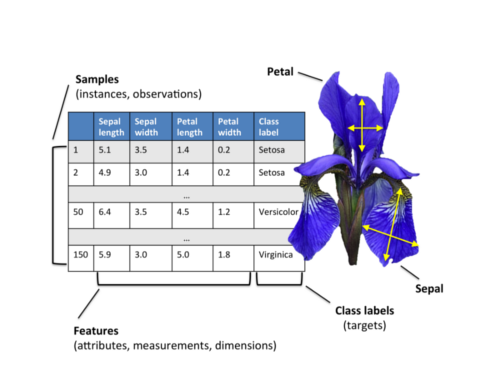|
|:--:|
|**Iris Dataset** |

In [ ]:
## Cargamos el dataset de plantas de Iris
iris = load_iris()
iris_X, iris_y = iris.data, iris.target
#Divididmos en entremamiento y prueba
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y,
                                                    test_size=0.30,
                                                    random_state=3,
                                                    stratify=iris_y)

In [ ]:
# Instanciamos y entremamos un clasificacor nearest centroids
iris_clf=NearestCentroid(distance='coseno').fit(iris_X_train,iris_y_train)

In [ ]:
# Los centroides son en 4 dimensiones
iris_clf.centroids_

In [ ]:
# Predecimos las etiquetas del conjunto de prueba
iris_yp=iris_clf.predict(iris_X_test)
# Medidas de bondad
print("Recall: ", recall_score(iris_y_test,iris_yp,average='macro'))
print("F1: ", f1_score(iris_y_test,iris_yp,average='macro'))
print("Precision: ", precision_score(iris_y_test,iris_yp,average='macro'))

In [ ]:
# Limite de decisión proyectado con PCA, recuerde que los elemetos son de dimension 4
plotDecisionBoundary(iris_clf,iris_X_train,iris_y_train)

## Clasificador $k$ Nearest Neighbor

El clasificador $k$ nearest neighbor ($k$NN), es un método no paramétrico que utiliza todos ejemplos en el conjunto de entrenamiento para predecir la clase de los ejemplos no etiquetados. Por lo que no hay fase de entrenamiento, la predicción se realiza mediante el uso de una función de similitud/distancia.

El clasificador $k$NN es simple e intuitivo, para $k=1$ funciona como sigue: dado un vector $x_q$, se le asocia la clase $\theta_q$ que será la misma que tenga el elemento más similar a $x_{nn} \in X$ más similar a $x_q$. El objeto $x_{nn}$ se determina como  $\arg\!\max_{1 \leq i \leq |X|} \cos (x_q, x_i)$ cuando se utiliza la similitud coseno o bien como $\arg\!\min_{1 \leq i \leq |X|} d(u, x_i)$  cuando se utiliza una función de distancia. Lo anterior da el origen al nombre desde que para determinar la clase de un objeto no etiquetado, primero debe encontrarse su vecino más cercano.  Una mejora directa es utilizar más de un vecino para calcular la clase de $x_q$, es decir utilizar $k>1$. Para $k>1$ se puede asignar a $x_q$ la clase que más se repita entre los $k$ vecinos más cercanos de $x_q$ (**pesado uniforme**).

|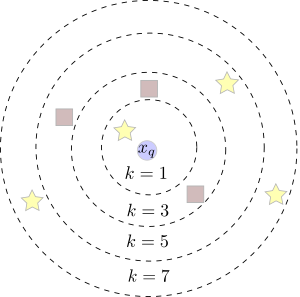|
|:--:|
|**Consulta $k$NN para diferentes valores de $k$**|

### Pesado de vecinos por distancia

También es común realizar un pesado de la contribución de cada vecino basados en el valor de la función de distancia o similitud. Para nuestro caso solo utilizaremos dos variantes simples. 

-  **$k$NN distancia/similitud media**: En este caso se asigna a  $x_q$ la clase en la que la distancia media de los $k$ vecinos seleccionados sea menor. Mientras que se utiliza el valor mayor cuando se utiliza una función de similitud.
- **$k$NN pesado por distancia**: Una forma básica de pesar cuando se utiliza una función de distancia es asignar a cada etiqueta un peso equivalente al inverso de la distancia. En el caso de la similitud puede ser el valor normalizado de la misma(cuando se usa coseno el valor ya está entre 0 y 1). Se asigna la clase que tenga el mayor peso.

Por ejemplo suponga que la información de cinco vecinos más cercanos para un $x_q$ dado en problema de 3 clases se resumen en la siguiente tabla. 

|&nbsp;|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|
|:------------:|:---:|:---:|:---:|:---:|:---:|
|Clase de $x_i$|  2  |  1  |  2  |  1  |  0  |
|$$d(x_i,x_q)$$| 0.5 | 0.2 |0.25 | 0.4 |0.125|
|$$w_{x_i}$$       |  2  |  5  |  4  | 2.5 |  8  |

en las siguiente tabla se muestra como se calculan los scores para cada clase

| <br /> | distancia media                    | pesado por distancia |uniforme|
|:------:|:---------------------------------: |:--------------:       |:----:|
|Clase 0 |  $d(x_5,x_q)/1$=**0.125**          |$w_{x_0}$=**8**            |   1  |
|Clase 1 |  $$(d(x_2,x_q)+d(x_4,x_q))/2=0.3$$   |$$w_{x_2}+w_{x_4}=7.5$$|   **2**  |
|Clase 2 |  $$(d(x_1,x_q)+d(x_3,x_q))/2=0.225$$ |$$w_{x_1}+w_{x_3}=6$$  |   **2**  |

usando la información en la tabla anterior podemos ver que para $k=5$, si se utiliza el criterio de la distancia mínimo promedio la clase para $x_q$ sería 0, al igual que para el pesado por distancia; mientras que para la decisión por mayoría de votos podría ser la clase 1 o 2. 

**Nota**: Si se utiliza una función de similitud no es necesario calcular el inverso, pero es buena idea normalizar.

- Se proporciona solución  mediante el uso de indices implementados en la librería **faiss**. En este caso la fase de entrenamiento consiste en generar el indice para los datos de entrenamiento.
- La versión **bruta/lineal** de $k$NN,  cada que se predice se debe calcular la distancia con respecto a todos los elementos en el conjunto de entrenamiento para determinar los $k$  más cercano. En este caso la fase de entrenamiento no se realiza, pero la predicción es costosa.


In [ ]:
#Probamos el clasificador con pesado uniforme con el ejemplo de los blobs
nn_clf=kNN(k=3,weight_type="weighedDist").fit(blobs_X_train,blobs_y_train)
plotDecisionBoundary(nn_clf,blobs_X_train,blobs_y_train)

In [ ]:
#Probamos el clasificador con pesado uniforme con el ejemplo de los blobs
nn_clf=kNN(k=3,weight_type="uniform").fit(blobs_X_train,blobs_y_train)
plotDecisionBoundary(nn_clf,blobs_X_train,blobs_y_train)

In [ ]:
#El data set de Iris
nn_clf=kNN(k=3,weight_type="uniform").fit(iris_X_train,iris_y_train)
plotDecisionBoundary(nn_clf,iris_X_train,iris_y_train)

In [ ]:
#Dataser de los circulos, utilizando distancia euclidiana
nn_clf=kNN(distance='euclideana', 
           k=3,weight_type="uniform").fit(circles_X_train,circles_y_train)
plotDecisionBoundary(nn_clf,circles_X_train,circles_y_train)

In [ ]:
#Dataser de los circulos, utilizando distancia euclidiana
nn_clf=kNN(k=3,distance='coseno',weight_type="uniform").fit(circles_X_train,circles_y_train)
plotDecisionBoundary(nn_clf,circles_X_train,circles_y_train)

## Un problema de texto  (Identificación de humor HAHA -2019)

Para este ejemplo utilizaremos los datos proporcionados para la tarea 1 del HAHA - Humor Analysis based on Human Annotation, la cual consiste determinar si tweets en español son humorísticos o no (un problema de clasificación binaria). Esta tarea forma parte del Iberian Languages Evaluation Forum (IberLEF 2019).

### Corpus 

El conjunto de datos fue etiquetado como se indica [5]. Todos los tweets están etiquetados como humorístico **is_humor=1**  o no humorístico **is_humor=0**. Los datos relevantes para el problema se clasificación ser muestran en el siguiente ejemplo:

|Desscripción|Clave|Valor|
|:------:|:------:|:-----:|
|Tweet |text|Después de la tormenta sale... Tu mamá gritando porque no metiste la ropa.|
|Etiqueta de clase|is_humor|1|
|Representación vectorial|vec| Vectores de dimensión 300 (FastText preentrenados para español) |
|Identificador|id|942079817905770496|



In [3]:
# Cargamos lod datos.
train_data=pd.read_json('data/haha_train_ft_pre_min10.json',lines=True)

In [4]:
#Vemos los primeros 5
train_data.head()[['id','text','is_humor','vec']]

,id,text,is_humor,vec
0,965767017268678658,Amo a @CamilaTuDiosaxD,0,"[-0.06692000000000001, 0.13184, -0.0030723, -0..."
1,965811724392726528,@NamiNapoleon hola como estan me pueden seguir,0,"[-0.06776, -0.24253000000000002, -0.0065559999..."
2,964984559547777024,Típico : Estar viajando en taxi y pensar tácti...,1,"[-0.044634, -0.049435, -0.053049, -0.026851, 0..."
3,941669646364762113,Me gusta todo de ti.. te amo espejo.,1,"[-0.022054999999999998, -0.064284, -0.052083, ..."
4,1009142890415652866,""" Egipto siempre acaba afuera ""\r\n\r\nCleopatra",1,"[0.066164, -0.082201, -0.022706, -0.047533, 0...."


In [5]:
#Dimensión de los vectores
len(train_data.vec[3])

300

In [6]:
# Los datos de prueba
test_data=pd.read_json('data/haha_test_ft_pre_min10.json',lines=True)

In [7]:
#Obtenemos la representación vectorial para los conjunto de prueba y entrenamiento
train,y_train=np.array([np.array(x) for x in train_data.vec]),np.array(train_data.is_humor)
test,y_test=np.array([np.array(x) for x in test_data.vec]),np.array(test_data.is_humor)

In [8]:
#Usamos nuestro clasificacdor NC
haha_clf=NearestCentroid(distance='coseno',
                         centroid_type='Average').fit(train,y_train)

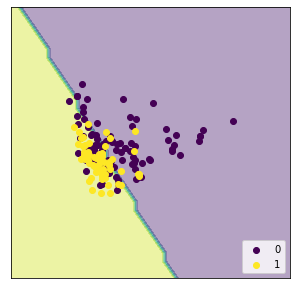

In [9]:
#Vemos la frontera de decisión
plotDecisionBoundary(haha_clf,train, y_train)

In [10]:
#Predecimos las etiqueta del conjunto de prueba
haha_yp=haha_clf.predict(test)

In [11]:
# Medidas de bondad
print("Recall: ", recall_score(y_test,haha_yp,average='macro'))
print("F1: ", f1_score(y_test,haha_yp,average='macro'))
print("Accuracy: ",accuracy_score(y_test,haha_yp))
print("F1 Humor: ", f1_score(y_test,haha_yp))

Recall:  0.7108108108108109
F1:  0.7069199457259159
Accuracy:  0.7083333333333334
F1 Humor:  0.7272727272727272


In [12]:
#Ahora probamos el clasificador kNN con pesado uniforme
haha_clfk=kNN(distance='coseno',k=5,weight_type='uniform').fit(train,y_train)

In [13]:
#Predecimos
haha_ypk=haha_clfk.predict(test)

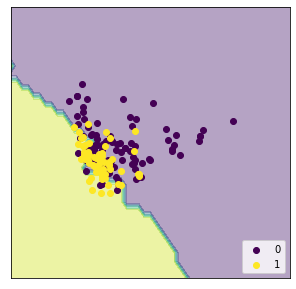

In [15]:
#Frontera de decisión
plotDecisionBoundary(haha_clfk,train,y_train)

In [14]:
# Medidas de bondad
print("Recall: ", recall_score(y_test,haha_ypk,average='macro'))
print("F1: ", f1_score(y_test,haha_ypk,average='macro'))
print("Accuracy: ", accuracy_score(y_test,haha_ypk))
print("F1 Humor: ", f1_score(y_test,haha_ypk))

Recall:  0.6776061776061776
F1:  0.6754850088183422
Accuracy:  0.6805555555555556
F1 Humor:  0.634920634920635
